In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

df = pd.read_csv('nba_21features.csv')
df = df.dropna(axis=0)
print(df.columns)
df.head()

Index(['game_id', 'Game Date', 'Home Days Since Last Game',
       'Home Games Last 7 Days', 'Home Is Back-to-Back',
       'Away Days Since Last Game', 'Away Games Last 7 Days',
       'Away Is Back-to-Back', 'Away Team Recent 10 Win Rate',
       'Home Team Recent 10 Win Rate', 'Home Team Recent 3 Months Win Rate',
       'Away Team Recent 3 Months Win Rate', 'home_pts_avg_last10',
       'home_reb_avg_last10', 'home_ast_avg_last10',
       'home_plus_minus_avg_last10', 'away_pts_avg_last10',
       'away_reb_avg_last10', 'away_ast_avg_last10',
       'away_plus_minus_avg_last10', 'target', 'home_injury_count',
       'away_injury_count', 'is_playoffs'],
      dtype='object')


,game_id,Game Date,Home Days Since Last Game,Home Games Last 7 Days,Home Is Back-to-Back,Away Days Since Last Game,Away Games Last 7 Days,Away Is Back-to-Back,Away Team Recent 10 Win Rate,Home Team Recent 10 Win Rate,...,home_ast_avg_last10,home_plus_minus_avg_last10,away_pts_avg_last10,away_reb_avg_last10,away_ast_avg_last10,away_plus_minus_avg_last10,target,home_injury_count,away_injury_count,is_playoffs
0,29900423,2000-01-02,5.0,1,False,3.0,1,False,0.4,0.7,...,24.7,-0.6,102.2,45.4,20.0,2.4,1.0,0,0,False
1,29900427,2000-01-03,5.0,2,False,5.0,1,False,0.6,0.4,...,19.1,-0.5,103.9,42.6,21.7,4.5,0.0,0,0,False
2,29900426,2000-01-03,4.0,1,False,8.0,0,False,0.8,0.4,...,21.8,-0.5,97.1,43.0,24.4,-3.3,1.0,0,0,False
3,29900429,2000-01-03,5.0,2,False,11.0,0,False,0.7,0.8,...,24.3,6.7,100.5,46.1,22.1,2.7,1.0,0,0,False
4,29900428,2000-01-03,5.0,2,False,13.0,0,False,0.3,0.2,...,19.5,-14.4,96.6,44.8,24.4,6.1,0.0,0,0,False


In [4]:
X = df.drop(columns=['game_id', 'Game Date', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23071, 21), (5768, 21), (23071,), (5768,))

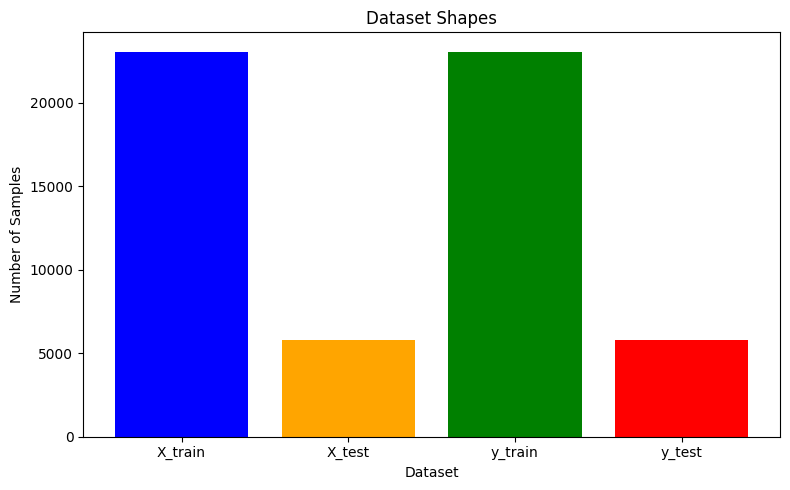

In [6]:
import matplotlib.pyplot as plt

# Data for visualization
shapes = [X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]]
labels = ['X_train', 'X_test', 'y_train', 'y_test']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, shapes, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Dataset")
plt.ylabel("Number of Samples")
plt.title("Dataset Shapes")
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate best model on test set
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.60      0.42      0.50      2319
         1.0       0.68      0.81      0.74      3449

    accuracy                           0.65      5768
   macro avg       0.64      0.62      0.62      5768
weighted avg       0.64      0.65      0.64      5768



In [8]:
param_grid = {
    'n_estimators': [30, 50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Apply Grid Search
grid_search_rf = GridSearchCV(
    rf,
    param_grid,
    n_jobs=-1
)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Evaluate best model
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

# Test set evaluation
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.6552817864138585
Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50      2319
         1.0       0.68      0.81      0.74      3449

    accuracy                           0.66      5768
   macro avg       0.64      0.62      0.62      5768
weighted avg       0.65      0.66      0.64      5768



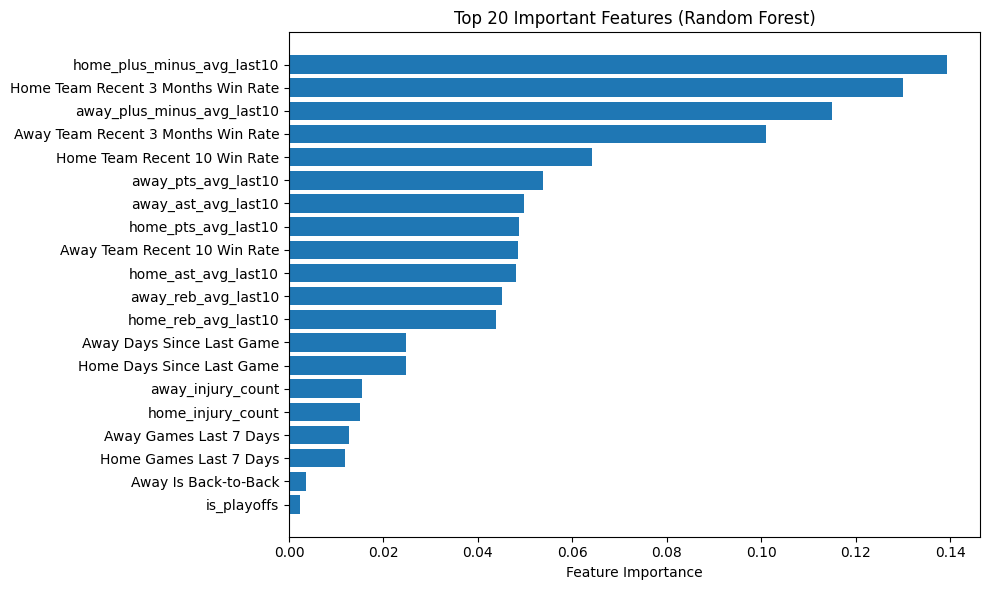

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best trained model
importances = best_rf.feature_importances_

# Map to column names (make sure X is your feature DataFrame, not np.array)
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features (Random Forest)")
plt.tight_layout()
plt.show()

In [10]:
X1 = X.drop(columns=['Away Is Back-to-Back', 'Home Is Back-to-Back'])
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [30, 50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20]
}

rf = RandomForestClassifier(random_state=42)

# Apply Grid Search
grid_search_rf = GridSearchCV(
    rf,
    param_grid,
    n_jobs=-1
)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Evaluate best model
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

# Test set evaluation
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.6558019142832051
Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50      2319
         1.0       0.68      0.81      0.74      3449

    accuracy                           0.66      5768
   macro avg       0.64      0.62      0.62      5768
weighted avg       0.65      0.66      0.64      5768



In [11]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate best model on test set
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.60      0.42      0.50      2319
         1.0       0.68      0.81      0.74      3449

    accuracy                           0.65      5768
   macro avg       0.64      0.62      0.62      5768
weighted avg       0.64      0.65      0.64      5768



In [12]:
df['pts_avg_gap']         = df['home_pts_avg_last10']         - df['away_pts_avg_last10']
df['reb_avg_gap']         = df['home_reb_avg_last10']         - df['away_reb_avg_last10']
df['ast_avg_gap']         = df['home_ast_avg_last10']         - df['away_ast_avg_last10']
df['plus_minus_gap']      = df['home_plus_minus_avg_last10']  - df['away_plus_minus_avg_last10']
df['win_rate_3m_gap']     = df['Home Team Recent 3 Months Win Rate'] - df['Away Team Recent 3 Months Win Rate']
df['win_rate_10_gap']     = df['Home Team Recent 10 Win Rate']       - df['Away Team Recent 10 Win Rate']

df.drop(columns=[
    'home_pts_avg_last10', 'away_pts_avg_last10',
    'home_reb_avg_last10', 'away_reb_avg_last10',
    'home_ast_avg_last10', 'away_ast_avg_last10',
    'home_plus_minus_avg_last10', 'away_plus_minus_avg_last10',
    'Home Team Recent 3 Months Win Rate', 'Away Team Recent 3 Months Win Rate',
    'Home Team Recent 10 Win Rate', 'Away Team Recent 10 Win Rate',
    'Away Is Back-to-Back', 'Home Is Back-to-Back'
], inplace=True)

df.head()

,game_id,Game Date,Home Days Since Last Game,Home Games Last 7 Days,Away Days Since Last Game,Away Games Last 7 Days,target,home_injury_count,away_injury_count,is_playoffs,pts_avg_gap,reb_avg_gap,ast_avg_gap,plus_minus_gap,win_rate_3m_gap,win_rate_10_gap
0,29900423,2000-01-02,5.0,1,3.0,1,1.0,0,0,False,-9.7,-1.8,4.7,-3.0,0.331731,0.3
1,29900427,2000-01-03,5.0,2,5.0,1,0.0,0,0,False,-2.2,5.1,-2.6,-5.0,-0.205128,-0.2
2,29900426,2000-01-03,4.0,1,8.0,0,1.0,0,0,False,-3.5,-0.3,-2.6,2.8,-0.428571,-0.4
3,29900429,2000-01-03,5.0,2,11.0,0,1.0,0,0,False,-5.7,-6.8,2.2,4.0,0.035714,0.1
4,29900428,2000-01-03,5.0,2,13.0,0,0.0,0,0,False,-15.0,-4.0,-4.9,-20.5,-0.083333,-0.1


In [13]:
df.head()

,game_id,Game Date,Home Days Since Last Game,Home Games Last 7 Days,Away Days Since Last Game,Away Games Last 7 Days,target,home_injury_count,away_injury_count,is_playoffs,pts_avg_gap,reb_avg_gap,ast_avg_gap,plus_minus_gap,win_rate_3m_gap,win_rate_10_gap
0,29900423,2000-01-02,5.0,1,3.0,1,1.0,0,0,False,-9.7,-1.8,4.7,-3.0,0.331731,0.3
1,29900427,2000-01-03,5.0,2,5.0,1,0.0,0,0,False,-2.2,5.1,-2.6,-5.0,-0.205128,-0.2
2,29900426,2000-01-03,4.0,1,8.0,0,1.0,0,0,False,-3.5,-0.3,-2.6,2.8,-0.428571,-0.4
3,29900429,2000-01-03,5.0,2,11.0,0,1.0,0,0,False,-5.7,-6.8,2.2,4.0,0.035714,0.1
4,29900428,2000-01-03,5.0,2,13.0,0,0.0,0,0,False,-15.0,-4.0,-4.9,-20.5,-0.083333,-0.1


In [ ]:
X = df.drop(columns=['game_id', 'Game Date', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Home Days Since Last Game,Home Games Last 7 Days,Away Days Since Last Game,Away Games Last 7 Days,home_injury_count,away_injury_count,is_playoffs,is_playoffs_game_df,pts_avg_gap,reb_avg_gap,ast_avg_gap,plus_minus_gap,win_rate_3m_gap,win_rate_10_gap
23598,2.0,2,4.0,2,4,6,False,False,-3.9,4.3,0.7,3.0,-0.069643,-0.2
22645,2.0,2,1.0,1,5,4,False,False,-1.5,-6.2,-3.1,2.6,0.000000,0.3
12718,3.0,2,3.0,2,1,1,False,False,4.5,-5.7,3.4,2.1,0.061905,0.3
10273,2.0,3,1.0,2,2,2,False,False,5.4,4.7,3.4,-12.5,-0.354037,-0.5
11199,2.0,3,5.0,1,2,3,False,False,13.3,1.8,5.5,5.4,0.418182,0.4


In [ ]:
param_grid = {
    'n_estimators': [30, 50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20]
}

rf = RandomForestClassifier(random_state=42)

# Apply Grid Search
grid_search_rf = GridSearchCV(
    rf,
    param_grid,
    n_jobs=-1
)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Evaluate best model
print("Best Parameters:", grid_search_rf.best_params_)

# Test set evaluation
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.6421916246235373
Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.59      0.38      0.46      2319
         1.0       0.66      0.82      0.73      3449

    accuracy                           0.64      5768
   macro avg       0.63      0.60      0.60      5768
weighted avg       0.63      0.64      0.62      5768



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate best model on test set
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.59      0.40      0.47      2319
         1.0       0.67      0.81      0.73      3449

    accuracy                           0.64      5768
   macro avg       0.63      0.60      0.60      5768
weighted avg       0.63      0.64      0.63      5768

